In [1]:
import main
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Part 1: Movies analysis

In [2]:
# Setting graph params
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2F3235'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

plt.rcParams['axes.linewidth'] = 2

In [3]:
# Reading data files and processing
mpa_data, kim_data = main.read_movies_data_files()
post92 = main.movies_processing(mpa_data, kim_data)
post92

,Title,Rated,Released,Genre,Plot,Rating,Year,Sex,Violence,Language,agg_score
0,Superbabies: Baby Geniuses 2,PG,27 Aug 2004,"Comedy, Family, Sci-Fi",A group of smart-talking toddlers find themsel...,2.3.2,2004,2,3,2,7
1,Disaster Movie,PG-13,29 Aug 2008,Comedy,"Over the course of one evening, an unsuspectin...",7.8.5,2008,7,8,5,20
2,From Justin to Kelly,PG,20 Jun 2003,"Comedy, Musical, Romance",A waitress from Texas and a college student fr...,3.2.2,2003,3,2,2,7
3,Son of the Mask,PG,18 Feb 2005,"Comedy, Family, Fantasy","Tim Avery, an aspiring cartoonist, finds himse...",3.4.3,2005,3,4,3,10
4,Crossover,PG-13,01 Sep 2006,"Action, Sport","A naturally talented basketball player, Noah C...",5.3.5,2006,5,3,5,13
...,...,...,...,...,...,...,...,...,...,...,...
2667,Constantine,PG-13,24 Oct 2014,"Drama, Fantasy, Horror",A man struggling with his faith who is haunted...,2.8.5,2014,2,8,5,15
2671,Rush Hour,PG-13,31 Mar 2016,"Action, Comedy, Crime",TV show based on the action-comedy 'Rush Hour'...,1.6.5,2016,1,6,5,12
2672,Limitless,PG-13,22 Sep 2015,"Comedy, Crime, Drama",An average 28-year-old man who gains the abili...,6.7.5,2015,6,7,5,18
2673,The Family,PG,03 Mar 2016,"Drama, Mystery",A community is rattled when a politician's son...,6.7.8,2016,6,7,8,21


In [4]:
# Calculate percentage distribution by genre and year, and unweighted KIM score
percentages = main.calculate_unweighted_score(post92)
percentages

### Unweighted score plot

<AxesSubplot:xlabel='Year', ylabel='unw_kim_score'>

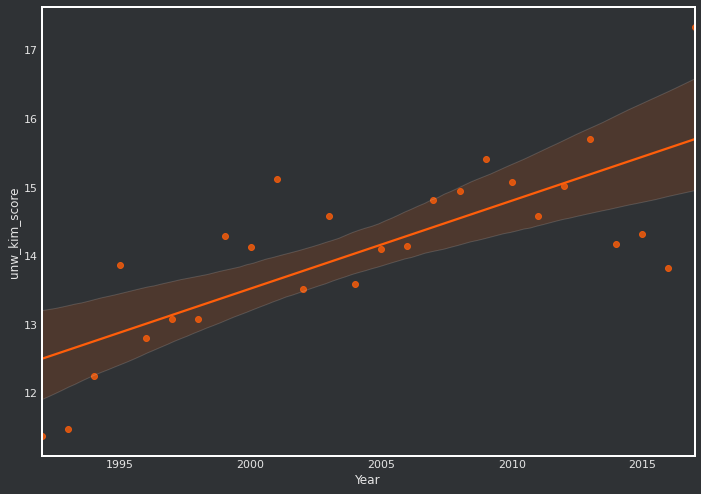

In [6]:
viz_df = percentages.reset_index()
viz_df['unw_kim_score'] = viz_df['unw_kim_score'].astype('float64')
viz_df['Year'] = viz_df['Year'].astype('int32')

sns.regplot(x=viz_df['Year'],y=viz_df['unw_kim_score'],ci=95,color=(255/255, 94/255, 10/255, 0.8))

### Weighted score plot

In [7]:
# Using mean percentage distribution and applying it over each year to calculate weighted KIM score
mean_percentage = dict(percentages.mean())
normalize_dict = percentages.to_dict()

# 10 indicates 10th column in dataframe, the agg_kim_score
post92['weighted_agg'] = post92.apply(main.calculate_weighted_score,args=[10, mean_percentage, normalize_dict], axis=1)
percentages['weighted_kim_score'] = post92.groupby('Year')['weighted_agg'].mean()

In [8]:
percentages

,G,PG,PG-13,R,unw_kim_score,weighted_kim_score
Year,,,,,,
1992,0.105263,0.105263,0.157895,0.631579,11.368421,10.824319
1993,0.035714,0.357143,0.214286,0.392857,11.464286,12.898595
1994,0.023810,0.166667,0.357143,0.452381,12.238095,12.361827
1995,0.038462,0.057692,0.307692,0.596154,13.865385,12.638741
1996,0.043478,0.144928,0.275362,0.536232,12.797101,12.460399
1997,0.016129,0.129032,0.338710,0.516129,13.080645,12.601274
1998,0.034483,0.114943,0.298851,0.551724,13.080460,12.408557
1999,0.024390,0.097561,0.308943,0.569106,14.284553,13.356841
2000,0.048000,0.112000,0.400000,0.440000,14.120000,14.207807


<AxesSubplot:xlabel='Year', ylabel='weighted_kim_score'>

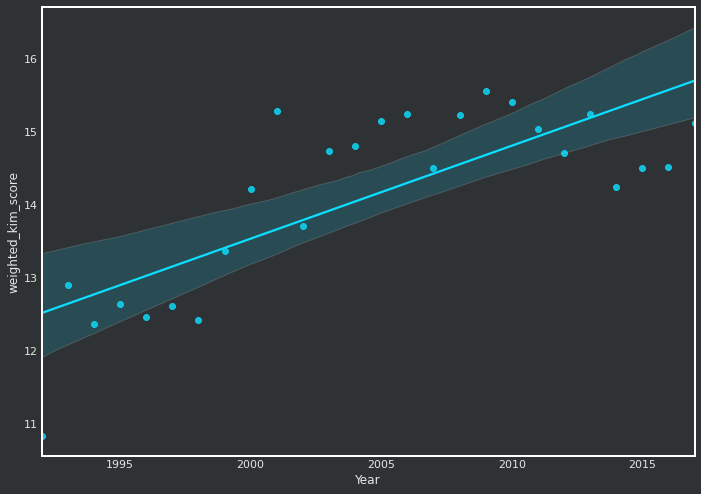

In [9]:
viz_df = percentages.reset_index()
viz_df['weighted_kim_score'] = viz_df['weighted_kim_score'].astype('float64')
viz_df['Year'] = viz_df['Year'].astype('int32')

sns.regplot(x=viz_df['Year'],y=viz_df['weighted_kim_score'],ci=95, color=(12/255, 222/255, 255/255, 0.9))

### Category wise distribution

In [10]:
# Category wise distribution of kim scores
cols_to_process = ['Sex','Violence','Language']
for col in cols_to_process:
    post92[col] = post92[col].astype('int32')

post92['weighted_sex'] = post92.apply(main.calculate_weighted_score,args=[7, mean_percentage, normalize_dict], axis=1)
post92['weighted_violence'] = post92.apply(main.calculate_weighted_score,args=[8, mean_percentage, normalize_dict], axis=1)
post92['weighted_language'] = post92.apply(main.calculate_weighted_score,args=[9, mean_percentage, normalize_dict], axis=1)

percentages['weighted_sex_score'] = post92.groupby('Year')['weighted_sex'].mean()
percentages['weighted_violence_score'] = post92.groupby('Year')['weighted_violence'].mean()
percentages['weighted_language_score'] = post92.groupby('Year')['weighted_language'].mean()


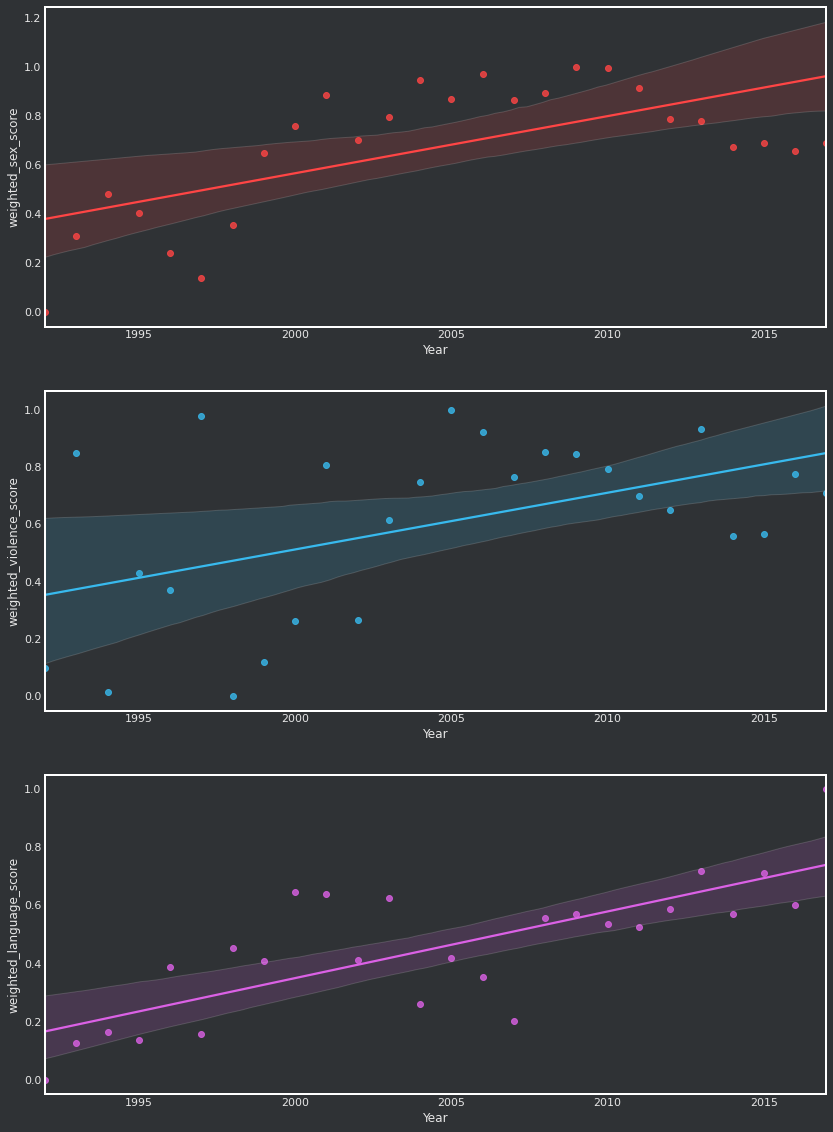

In [11]:
cols_to_graph = ['weighted_sex_score','weighted_violence_score','weighted_language_score']

temp_viz_df = percentages.reset_index()
temp_viz_df['Year'] = temp_viz_df['Year'].astype('int32')

# normalizing
temp_viz_df[cols_to_graph] = temp_viz_df[cols_to_graph].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

fig, ax = plt.subplots(3,figsize=(14,20))

colors = ['#FF4545','#38BAEE','#DB61E5']
    
for i, col in enumerate(cols_to_graph):
    

    plt.rcParams['axes.linewidth'] = 2
    sns.regplot(x=temp_viz_df['Year'],y=temp_viz_df[col],ci=95,ax=ax[i],color=colors[i])

In [12]:
# Correlation
correlations = main.calculate_score_correlation(temp_viz_df)

In [13]:
for key, val in correlations.items():
    print(key,":")
    print(val)

('weighted_sex_score', 'weighted_violence_score') :
{'correlation': 0.4780037925623087, 'p-value': 0.013517140834902535}
('weighted_sex_score', 'weighted_language_score') :
{'correlation': 0.5316793317405943, 'p-value': 0.005184505065872858}
('weighted_violence_score', 'weighted_language_score') :
{'correlation': 0.23140397942637314, 'p-value': 0.2553604768710101}


# Part 2: Music analysis

In [14]:
# Reading and processing data
music_df, charts_df, profanity_list = main.read_music_data_files()
post59 = main.music_processing(charts_df,music_df)

In [15]:
# Calculating percentage of profanity based on words list
post59['percent_prof'] = post59.apply(main.calculate_prof_percent, args=[profanity_list], axis=1)
prof_percent_year = pd.DataFrame(post59.groupby('release_date')['percent_prof'].mean().reset_index())

### Plotting profanity percentage

<AxesSubplot:xlabel='release_date', ylabel='percent_prof'>

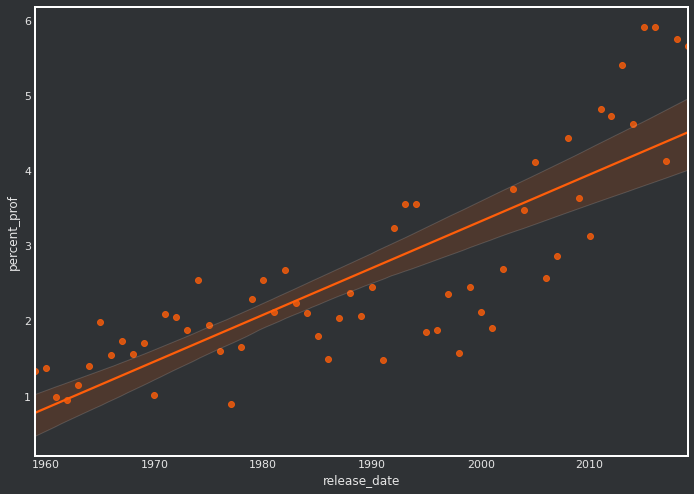

In [16]:
sns.regplot(x=prof_percent_year['release_date'],y=prof_percent_year['percent_prof'],ci=95, color=(255/255, 94/255, 10/255, 0.8))

### Plotting profanity percentage and popularity by genre

In [17]:
# Popularity of a genre is measured as the percentage of songs belonging to that genre in bilboard Top100 that year.
genre_prof = post59.groupby(['release_date','genre'])['percent_prof'].mean().reset_index()
popularity_percentage = post59.groupby('release_date')['genre'].apply(lambda x: x.value_counts(normalize = True)).unstack().to_dict()

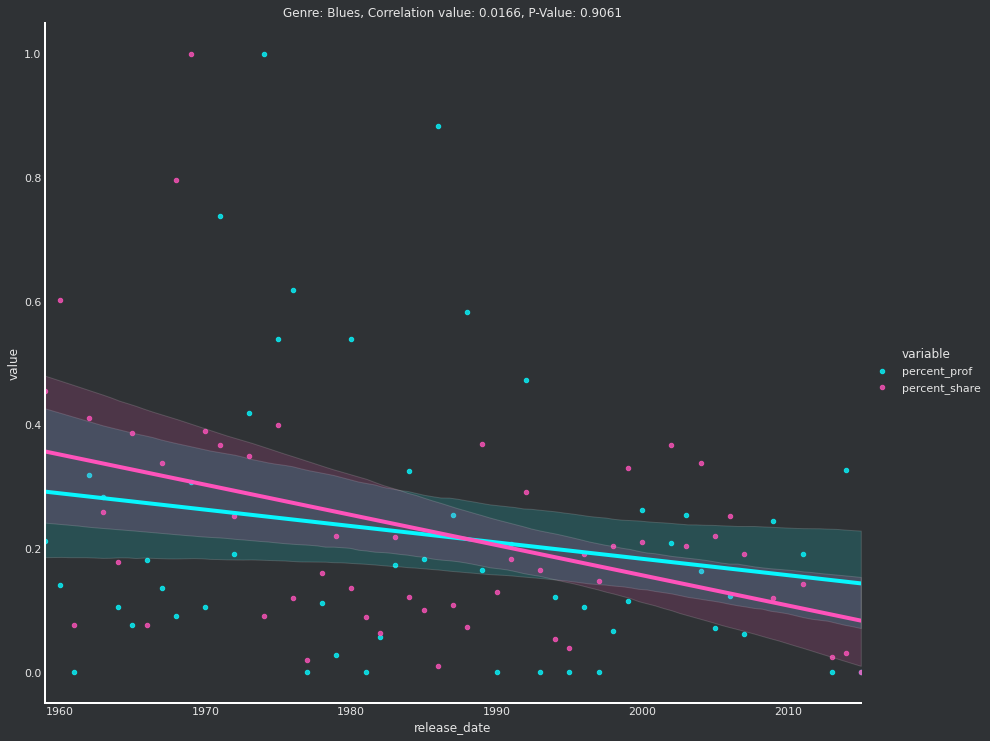

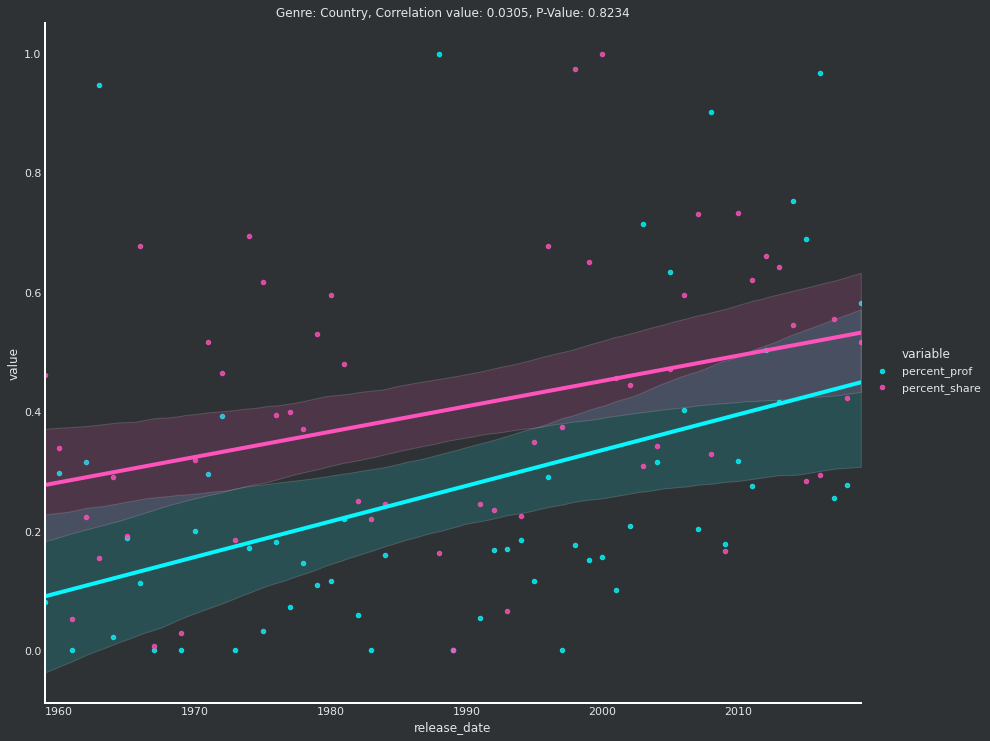

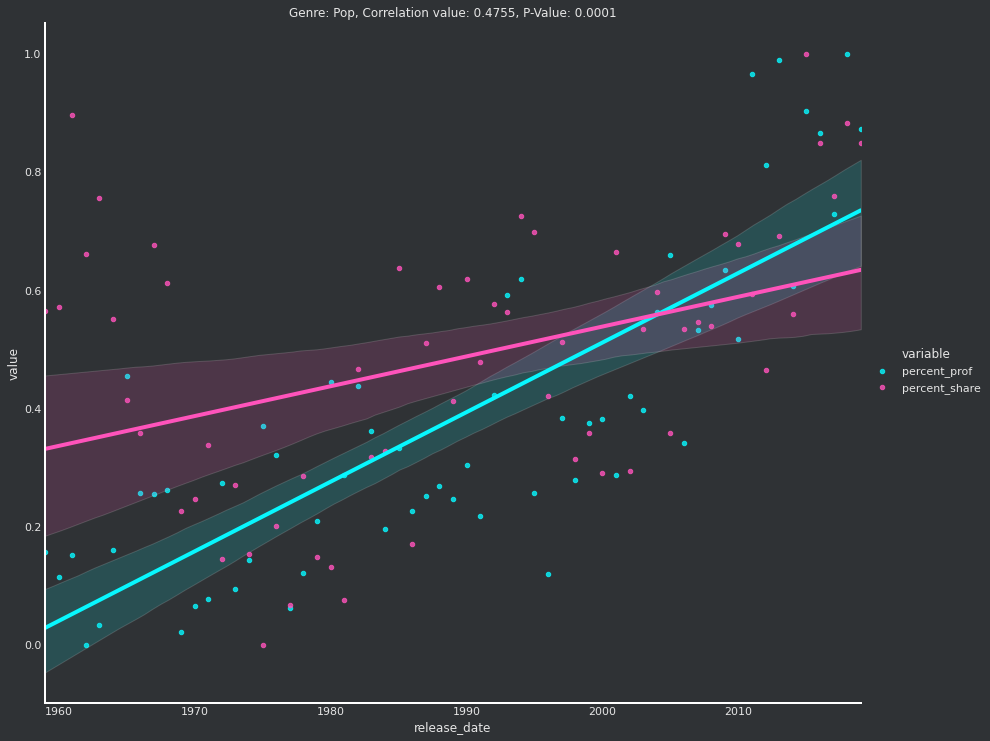

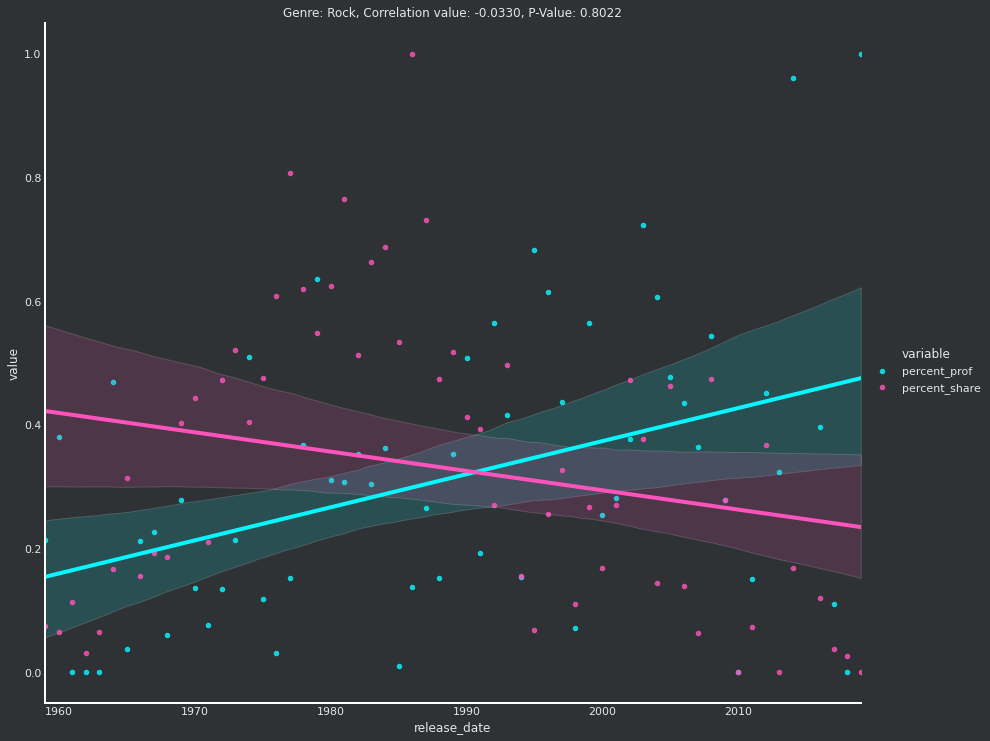

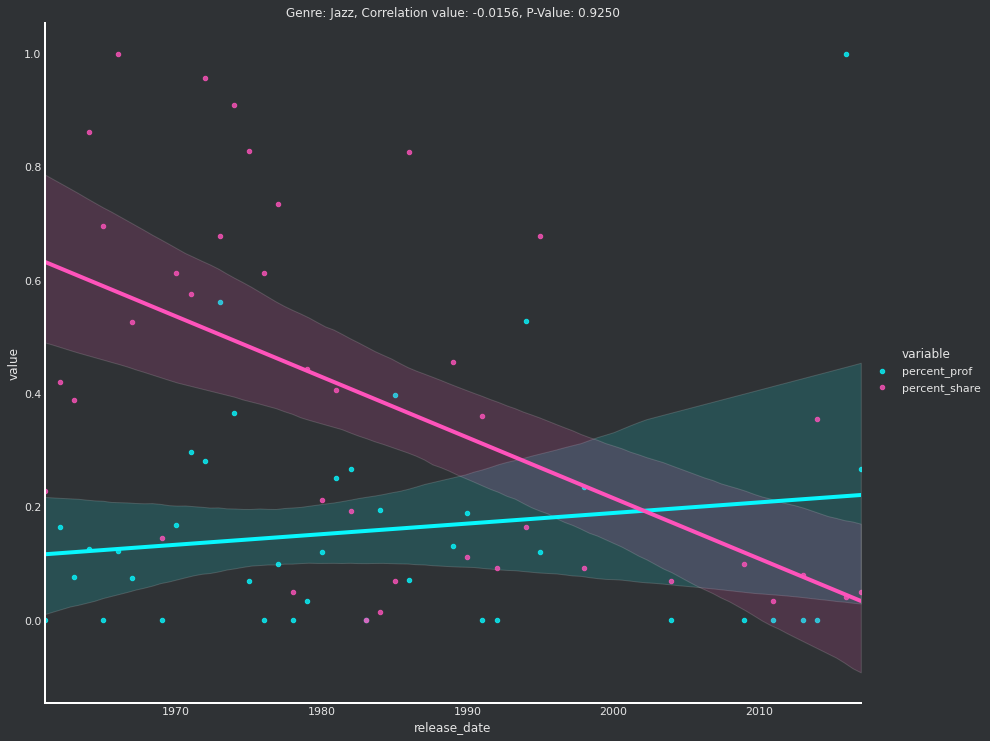

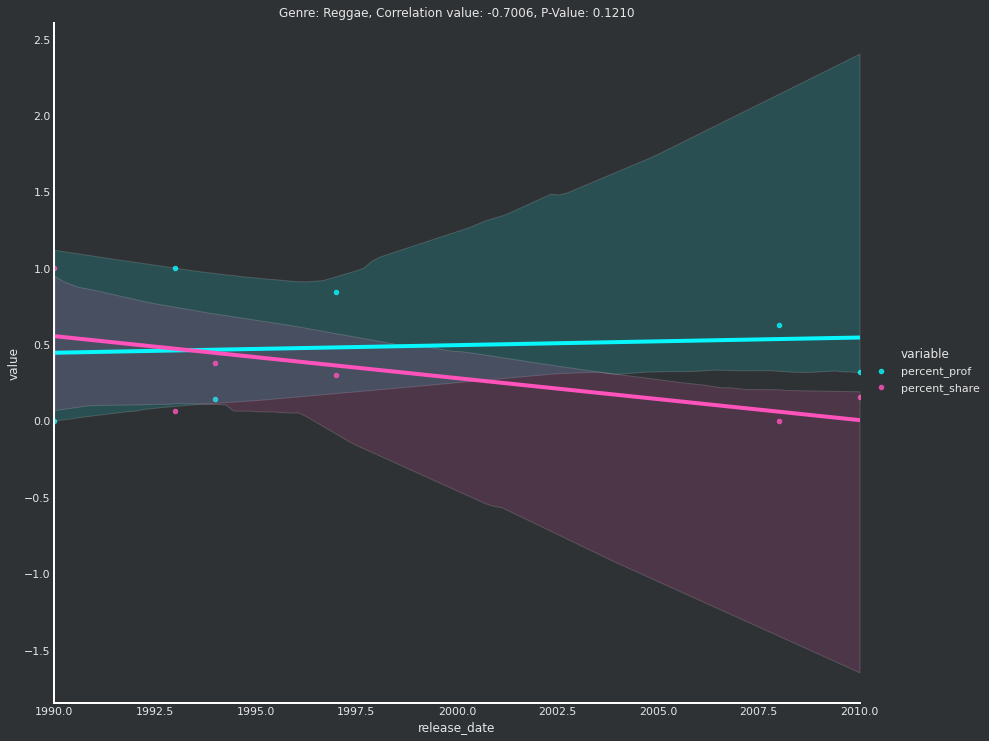

In [18]:
main.plot_genres(genre_prof, popularity_percentage)